In [1]:
# ML용 공통 코드

# 파이썬
# ≥3.5 필수
import sys
assert sys.version_info >= (3, 5)

# 공통 모듈 임포트
import numpy as np
import pandas as pd
import os

# 깔끔한 그래프 출력을 위해 %matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


# 그림을 저장할 위치
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
# 이미지를 저장할 디렉토리 생성
os.makedirs(IMAGES_PATH, exist_ok=True)

# 이미지 저장
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

from matplotlib import font_manager, rc
import platform

path = "c:/Windows/Fonts/malgun.ttf"
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
    
    
mpl.rcParams['axes.unicode_minus'] = False
# Jupyter Notebook의 출력을 소수점 이하 3자리로 제한
%precision 3

# 그래픽 출력을 좀 더 고급화하기 위한 라이브러리
import seaborn as sns

# 과학 기술 통계 라이브러리
import scipy as sp
from scipy import stats

# 사이킷런 ≥0.20 필수
# 0.20 이상 버전에서 데이터 변환을 위한 Transformer 클래스가 추가됨
import sklearn
assert sklearn.__version__ >= "0.20"

# 노트북 실행 결과를 동일하게 유지하기 위해 시드 고정
# 데이터를 분할할 때 동일한 분할을 만들어 냄
np.random.seed(21)

In [4]:
# 데이터 준비

data_url = 'http://lib.stat.cmu.edu/datasets/boston'
row_df = pd.read_csv(data_url,sep = '\s+', skiprows = 22, header = None)

data = np.hstack([row_df.values[::2, :], row_df.values[1::2, :2]])
target = row_df.values[1::2, 2]

bostonDF = pd.DataFrame(data, columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX',
                            'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'])
bostonDF['PRICE'] = target

## 다변량 회귀

### 보스턴 주택 가격을 다변량 선형 회귀를 통해 예측하기

In [6]:
# 데이터 가져오기

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis = 1, inplace = False)

#print(y_target.head())
#print(X_data.head())

In [15]:
# 훈련 데이터와 테스트 데이터 분리

from sklearn.model_selection import train_test_split

# 7:3 으로 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X_data, y_target,
                                                   test_size = 0.2, random_state = 21)

#print(X_train.shape) # 제대로 분할됐는지 확인
#print(X_test.shape)

In [16]:
# 회귀 모델을 만들고 훈련

from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [17]:
# 훈련된 모델 평가

y_pred = lr.predict(X_test)

# 훈련 평가 지표는 metrics 에 들어 있음
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
# mse 는 제곱을 사용하기 때문에 실제 데이터 보다 스케일이 큰 경우가 많음
# 그래서 mse 는 대신 제곱근을 적용해서 많이 사용함
rmse = np.sqrt(mse)

print('MSE : ', mse)
print('RMSE : ', rmse)
print('R2 score : ', r2)
# 훈련 데이터를 7대3 에서 8대2 로 바꿨더니 평가 점수가 상승하는 결과를 보임

MSE :  26.825400573939223
RMSE :  5.179324335658004
R2 score :  0.714936416139223


In [18]:
# 회귀 계수와 절편값 확인

print('절편 값 : ', lr.intercept_)
print('기울기(회귀 계수)', lr.coef_)
# 다변량 회귀이기 때문에 회귀 계수가 리스트로 여러 개가 나옴

절편 값 :  40.653176529790514
기울기(회귀 계수) [-8.774e-02  4.878e-02  1.947e-02  3.063e+00 -1.848e+01  3.347e+00
  3.220e-03 -1.426e+00  3.252e-01 -1.203e-02 -1.056e+00  1.077e-02
 -5.384e-01]


### score.csv 파일의 데이터(iq 와 academy, game, tv 를 이용한 시간)을 가지고 score 를 예측하기

In [20]:
# 데이터 가져오기
df = pd.read_csv('./data/score.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   name     10 non-null     object
 1   score    10 non-null     int64 
 2   iq       10 non-null     int64 
 3   academy  10 non-null     int64 
 4   game     10 non-null     int64 
 5   tv       10 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 608.0+ bytes


,name,score,iq,academy,game,tv
0,A,90,140,2,1,0
1,B,75,125,1,3,3
2,C,77,120,1,0,4
3,D,83,135,2,3,2
4,E,65,105,0,4,4


In [23]:
# statsmodel 에서 가져오기
import statsmodels.formula.api as sm

result = sm.ols(formula = 'score ~ iq + academy + game + tv',
               data = df).fit()
print('절편과 기울기 : ', result.params)
print('유의 확률(p-value) : ', result.pvalues)
print('결정 계수 : ', result.rsquared)
# 결정 계수가 0.96이라서 신뢰할만한 결과인것 같은데 pvalue 도 높음
# 일반적으로 p-value가 0.05 이상이면 문제가 있다고 봄
# academy 의 유의 확률이 0.53이면서 결정 계수는 0.96
# 둘 다 높게 나왔으므로 다중 공선성 문제일 가능성이 높음

절편과 기울기 :  Intercept    23.299232
iq            0.468422
academy       0.717901
game         -0.838955
tv           -1.385408
dtype: float64
유의 확률(p-value) :  Intercept    0.117508
iq           0.003376
academy      0.534402
game         0.131001
tv           0.184269
dtype: float64
결정 계수 :  0.9608351062148871


In [25]:
# iq 가 130, academy 는 3개, 게임 2시간, tv 2시간 보는 학생 예측
y = result.params.Intercept + 130*result.params.iq + 3 * result.params.academy + 2 * result.params.game + 2 * result.params.tv
print(y) # 81.8990

81.89907841030418


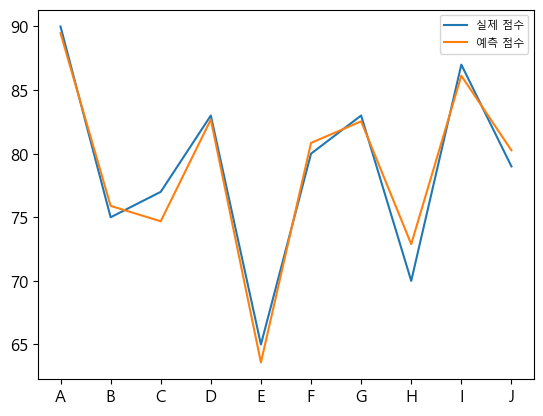

In [31]:
# 예측 값과 실제 값 시각화

# 결정 계수가 높으므로 오차가 거의 없음
plt.figure()
plt.plot(df['score'], label = '실제 점수')
plt.plot(result.predict(), label = '예측 점수')
plt.xticks(range(0, 10), df['name'])
plt.legend(fontsize = 8)
plt.show()


In [38]:
# VIF(분산 팽창 요인) 출력

# VIF와 관련 없는 요인은 drop
X = df.drop(['score', 'name'], axis = 1)

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
# score, name 을 제외한 4가지에 대해 VIF 계산
# iq, academy, game, tv 순서
vif['VIF factor'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['features'] = X.columns
print(vif)

   VIF factor features
0   31.162062       iq
1   13.444494  academy
2    3.054510     game
3    7.783607       tv


### 보스턴 주택 가격 데이터에 Ridge 모델 적용

In [40]:
from sklearn.linear_model import Ridge

# 데이터 생성
y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis = 1, inplace = False)

In [44]:
from sklearn.model_selection import cross_val_score

# 적용할 규제 값 설정
alphas = [0, 0.1, 0.5, 1, 10, 100]

# Ridge 모델을 생성하고 교차 검증에 사용
# 'PRICE' 와 나머지를 데이터로 사용하고 5 겹 교차 검증을 진행
# 이후 결과를 가지고 RMSE 를 계산
for alpha in alphas:
    ridge = Ridge(alpha = alpha)
    neg_mse_scores = cross_val_score(ridge, X_data, y_target,
                            scoring = 'neg_mean_squared_error', cv = 5)
    avg_rmse = np.mean(np.sqrt((-1) * neg_mse_scores))
    print('alpha {0} 일 때 folds의 평균 RMSE : {1}'.format(alpha, avg_rmse))
    
# 규제 값이 커질수록 RMSE 가 작아짐(5.82 -> 5.32)
# 규제 값이 커질수록 더 정확해지는 경향을 보임
# 규제 값이 커질수록 불필요한 값(데이터)들을 제거해나감

alpha 0 일 때 folds의 평균 RMSE : 5.828658946215806
alpha 0.1 일 때 folds의 평균 RMSE : 5.788486627032412
alpha 0.5 일 때 folds의 평균 RMSE : 5.700420357493769
alpha 1 일 때 folds의 평균 RMSE : 5.652570965613549
alpha 10 일 때 folds의 평균 RMSE : 5.518166280868973
alpha 100 일 때 folds의 평균 RMSE : 5.329589628472148


## 비선형 회귀

### KNN

In [45]:
from sklearn.neighbors import KNeighborsRegressor

# 이웃의 수는 3개로 설정
# weights 를 통해 가중치를 설정하는데 거리를 이용해 가중치 설정
# weights 에 uniform 을 설정하면 일반적인 평균을 계산
k_regressor = KNeighborsRegressor(n_neighbors = 3,
                                  weights = 'distance')

In [49]:
# 데이터 생성
X_train = [
    [1, 3, 2],
    [5, 2, 7],
    [9, 0, 3],
    [4, 6, 2]
]
y_train = [2, 5, 4, 4]

# 훈련
k_regressor.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3, weights='distance')

In [52]:
# 테스트 데이터 생성 및 예측

X_test = [
    [2, 0, 1],
    [4, 6, 3],
    [5, 6, 7]
]

pred = k_regressor.predict(X_test)
print(pred)
# [3.234 3.797 3.944]

# 이전과 달리 회귀 함수가 나오지 않기 때문에 비선형 회귀라고 함

[3.234 3.797 3.944]


### Decision Tree 를 이용한 회귀 및 시각화

In [53]:
# 샘플 데이터 생성

m = 200
X = np.random.rand(m, 1)
y = (X - 0.5) ** 2
# 데이터에 노이즈(random) 더하기
y += np.random.randn(m, 1) / 10

In [54]:
from sklearn.tree import DecisionTreeRegressor

# 모델 생성하고 훈련
tree_reg = DecisionTreeRegressor(max_depth = 2, random_state = 21)
tree_reg.fit(X, y)

DecisionTreeRegressor(max_depth=2, random_state=21)

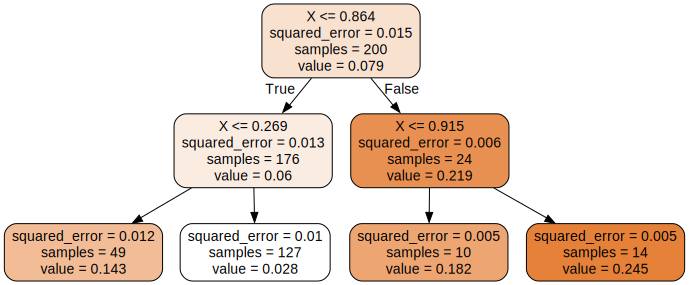

In [57]:
# 결정 트리 시각화
from graphviz import Source
from sklearn.tree import export_graphviz

# 트리 시각화에 사용할 파일 생성
export_graphviz(
    tree_reg,
    out_file = 'decision_tree.dot',
    feature_names = ['X'],
    class_names= 'y',
    rounded = True,
    filled = True
)

# 화면에 출력
with open('decision_tree.dot') as f:
    tree_graph = f.read()

src = Source(tree_graph)
src
# squared_error 는 MSE

In [61]:
# max_depth 를 조절한 결과 - 2 > 4

tree_reg = DecisionTreeRegressor(max_depth = 4, random_state = 21)
tree_reg.fit(X, y)

export_graphviz(
    tree_reg,
    out_file = 'decision_tree.dot',
    feature_names = ['X'],
    class_names= 'y',
    rounded = True,
    filled = True
)


with open('decision_tree.dot') as f:
    tree_graph = f.read()

src = Source(tree_graph)
#src
# 리프 노드의 squared_error 를 확인해보면 이전에 비해 작아진 것을 확인 가능
# 훈련 데이터에 일치하는 모델이 만들어져서 새로운 데이터에 대해
# 제대로 예측하지 못할 수 있음

In [60]:
# max_depth 대신에 min_samples_leaf 를 사용

# 터미널(자식이 없는 노드 - leaf node)의 수가 10 이성이어야 한다는 제약
# 이 설정을 하게 되면 각 터미널의 depth 가 일정하지 않을 수 있음
# 대신 각 터미널이 갖는 samples 의 크기(수) 가 서로 비슷해짐
tree_reg = DecisionTreeRegressor(min_samples_leaf = 10, random_state = 21)
tree_reg.fit(X, y)

export_graphviz(
    tree_reg,
    out_file = 'decision_tree.dot',
    feature_names = ['X'],
    class_names= 'y',
    rounded = True,
    filled = True
)


with open('decision_tree.dot') as f:
    tree_graph = f.read()

src = Source(tree_graph)
#src

### SVM 을 이용한 회귀

In [78]:
# 샘플 데이터 생성
np.random.seed(21)
m = 100
X = 2 * np.random.rand(m, 1)
# ravel 은 차원을 하나 낮추는 기능을 하는 함수
# target 은 1차원 배열이어야 해서 차원을 수정
# flatten 이나 reshape 를 사용해도 무방
y = (4 + 3 * X + np.random.randn(m, 1)).ravel()
#print(y)

X_train = X[:70]
X_test = X[70:]
y_train = y[:70]
y_test = y[70:]



In [79]:
from sklearn.svm import LinearSVR
# 모델 생성
svm_reg = LinearSVR(epsilon = 1.0, random_state = 21)
svm_reg.fit(X_train, y_train)

LinearSVR(epsilon=1.0, random_state=21)

In [80]:
# 예측 및 평가

y_pred = svm_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(y_test)
print(y_pred)
print('MSE : ', mse) # 0.8964
print('RMSE : ', rmse) # 0.9467

[ 5.1    5.556 10.808  5.141  7.803  2.587  6.649  8.601  9.     6.136
  8.076  4.934  5.892  6.457  8.038  8.     7.496  7.522  9.641  3.917
  3.423  9.255  4.436  7.262  9.761  4.068  7.892  3.307  7.092  8.1  ]
[4.933 4.998 8.901 6.08  6.173 4.195 7.646 8.635 9.177 5.089 8.945 4.984
 6.129 6.18  7.276 6.93  7.034 7.    9.378 5.39  5.168 8.704 5.724 7.886
 9.33  4.363 8.505 4.16  6.918 6.509]
MSE :  0.8964270860811067
RMSE :  0.9467983344308896


In [81]:
# margin(epsilon) 변화 시킴 - RMSE 감소

svm_reg = LinearSVR(epsilon = 2.0, random_state = 21)
svm_reg.fit(X_train, y_train)

y_pred = svm_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(y_test)
print(y_pred)
print('MSE : ', mse)
print('RMSE : ', rmse)

[ 5.1    5.556 10.808  5.141  7.803  2.587  6.649  8.601  9.     6.136
  8.076  4.934  5.892  6.457  8.038  8.     7.496  7.522  9.641  3.917
  3.423  9.255  4.436  7.262  9.761  4.068  7.892  3.307  7.092  8.1  ]
[4.6   4.673 9.02  5.878 5.981 3.779 7.622 8.724 9.327 4.774 9.068 4.657
 5.933 5.989 7.21  6.824 6.941 6.903 9.552 5.11  4.862 8.801 5.481 7.889
 9.498 3.965 8.579 3.739 6.811 6.356]
MSE :  0.8507560754669804
RMSE :  0.9223643940802249


In [82]:
# 비선형 데이터 생성
m = 100
X = 2 * np.random.rand(m, 1)
y = (3 + 2 * X + 0.5 * X ** 2 + np.random.randn(m, 1) / 10).ravel()

X_train = X[:70]
X_test = X[70:]
y_train = y[:70]
y_test = y[70:]

MSE :  1.1106523191842366
RMSE :  1.053874906800725


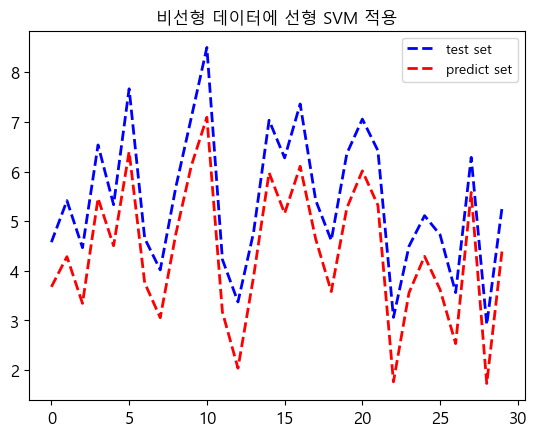

In [86]:
# 비선형 데이터에 선형 SVM 적용

svm_reg = LinearSVR(epsilon = 1.5, random_state = 21)
svm_reg.fit(X_train, y_train)

y_pred = svm_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

#print(y_test)
#print(y_pred)
print('MSE : ', mse) # 1.1106
print('RMSE : ', rmse) # 1.0538
# 선형 데이터에 비해 MSE, RMSE 값이 매우 커짐

plt.title('비선형 데이터에 선형 SVM 적용')
plt.plot(y_test, 'b--', linewidth = 2, label = 'test set')
plt.plot(y_pred, 'r--', linewidth = 2, label = 'predict set')
plt.legend()
plt.show()

MSE :  0.09928952708312153
RMSE :  0.3151024072950277


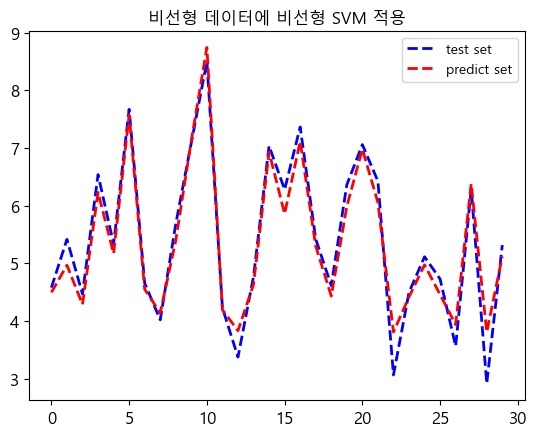

In [90]:
# 비선형 SVM 적용
from sklearn.svm import SVR

# kernel 과 degree(차수) 지정 가능
# 비선형 SVM 에서는 epsilon 값을 작게 지정해야 함
# 샘플 데이터를 2차 방정식을 사용해서 만들었기 때문에 degree 는 2가 최적
# 샘플 데이터를 알지 못하는 경우 degree 는 하이퍼 파라미터 튜닝을 해줘야 함
svm_reg = SVR(kernel = 'poly', degree = 2, epsilon = 0.2)
svm_reg.fit(X_train, y_train)

y_pred = svm_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

#print(y_test)
#print(y_pred)
print('MSE : ', mse) # 1.1106
print('RMSE : ', rmse) # 1.0538
# 선형 데이터에 비해 MSE, RMSE 값이 매우 커짐

plt.title('비선형 데이터에 비선형 SVM 적용')
plt.plot(y_test, 'b--', linewidth = 2, label = 'test set')
plt.plot(y_pred, 'r--', linewidth = 2, label = 'predict set')
plt.legend()
plt.show()
# 비선형 데이터에 비선형 SVM을 적용해서 MSE, RMSE 값이 많이 작아짐